In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.htfa as HTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
mini_pieman = niidb.FMriActivationsDb('data/mini_pieman.db',
                                      mask='data/pieman_data/wholebrain.nii.gz')

In [5]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis(list(mini_pieman.all()), num_factors=100,
                                                  mask='data/pieman_data/wholebrain.nii.gz')

06/06/2018 17:31:44 Loading Nifti image data/pieman_data/sub-001-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)
06/06/2018 17:31:46 Loading Nifti image data/pieman_data/sub-003-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)
06/06/2018 17:31:47 Loading Nifti image data/pieman_data/sub-002-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)


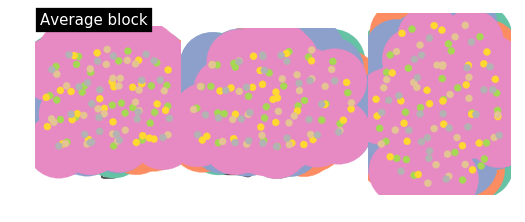

In [6]:
htfa.plot_factor_centers()

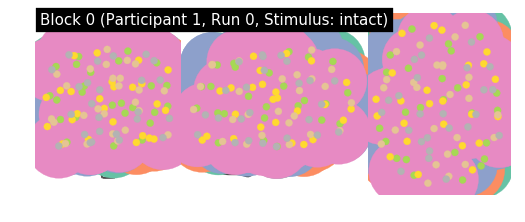

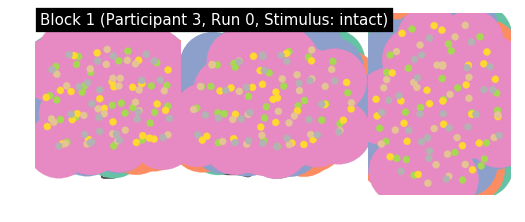

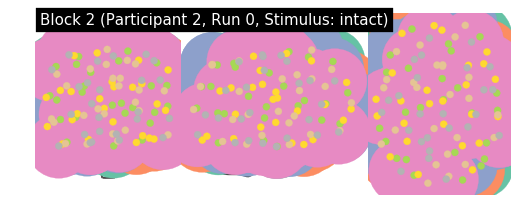

In [7]:
for b in range(htfa.num_blocks):
    htfa.plot_factor_centers(block=b)

In [8]:
losses = htfa.train(num_steps=500, learning_rate=1e-1, log_level=logging.INFO, num_particles=2,
                    batch_size=128, use_cuda=True, blocks_batch_size=8)

06/06/2018 17:33:31 [Epoch 1] (1100ms) Posterior free-energy 6.25121731e+10
06/06/2018 17:33:32 [Epoch 2] (948ms) Posterior free-energy 9.10515159e+10
06/06/2018 17:33:33 [Epoch 3] (982ms) Posterior free-energy 5.34367109e+10
06/06/2018 17:33:34 [Epoch 4] (1004ms) Posterior free-energy 3.25176013e+10
06/06/2018 17:33:35 [Epoch 5] (1001ms) Posterior free-energy 2.20583219e+10
06/06/2018 17:33:36 [Epoch 6] (975ms) Posterior free-energy 1.80378153e+10
06/06/2018 17:33:37 [Epoch 7] (965ms) Posterior free-energy 1.42795766e+10
06/06/2018 17:33:38 [Epoch 8] (988ms) Posterior free-energy 1.19570770e+10
06/06/2018 17:33:39 [Epoch 9] (994ms) Posterior free-energy 1.06551132e+10
06/06/2018 17:33:40 [Epoch 10] (971ms) Posterior free-energy 9.60853504e+09
06/06/2018 17:33:41 [Epoch 11] (966ms) Posterior free-energy 8.52150170e+09
06/06/2018 17:33:42 [Epoch 12] (982ms) Posterior free-energy 7.90752051e+09
06/06/2018 17:33:43 [Epoch 13] (976ms) Posterior free-energy 7.27099034e+09
06/06/2018 17:33:4

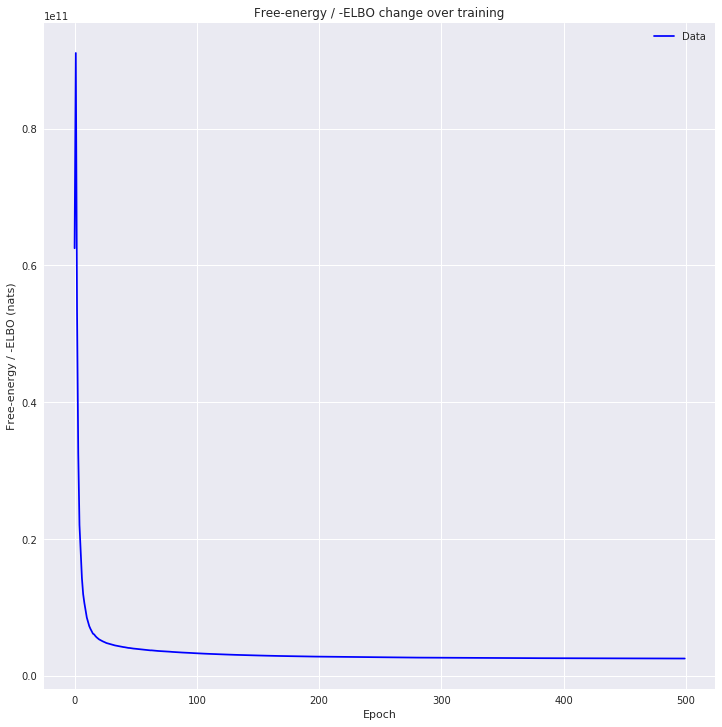

In [9]:
utils.plot_losses(losses)

In [10]:
htfa.normalize_activations()

[10.872537612915039, 9.790372848510742, 8.538802146911621]

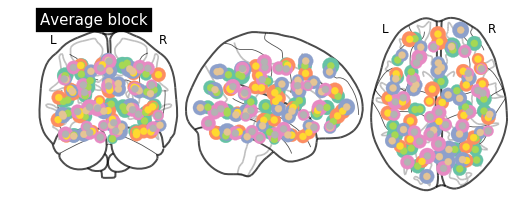

In [11]:
htfa.plot_factor_centers()

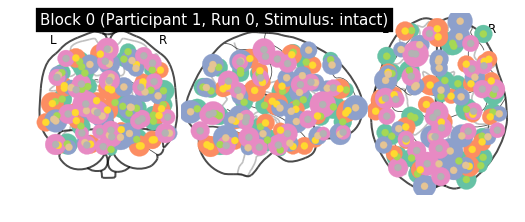

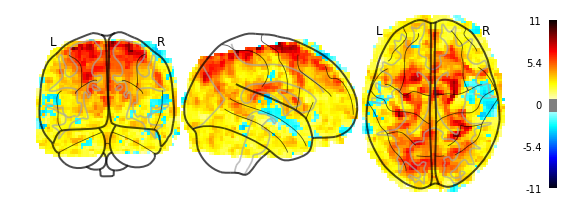

06/06/2018 17:42:12 Reconstruction Error (Frobenius Norm): 4.15642285e+03 out of 5.08479639e+03


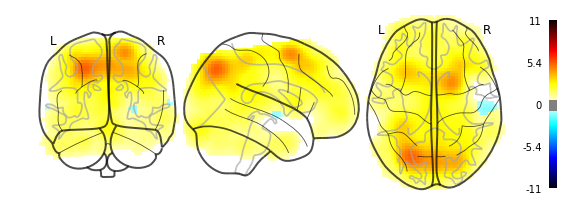

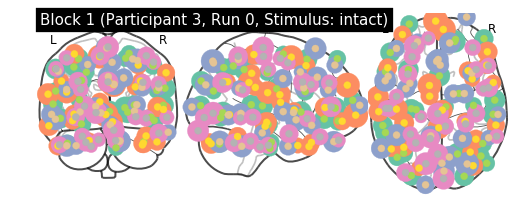

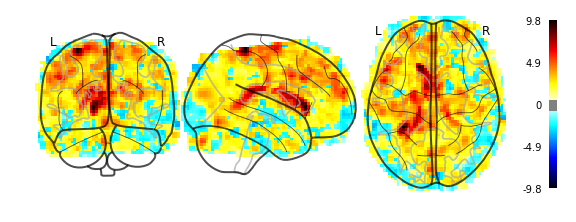

06/06/2018 17:42:39 Reconstruction Error (Frobenius Norm): 4.32667578e+03 out of 5.19534277e+03


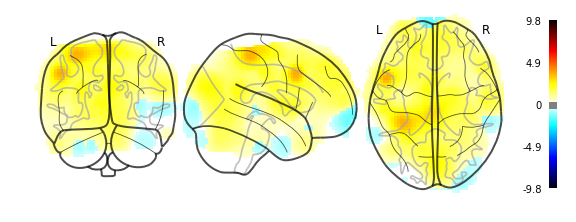

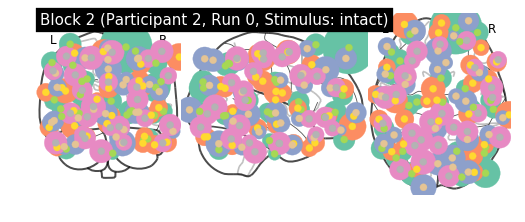

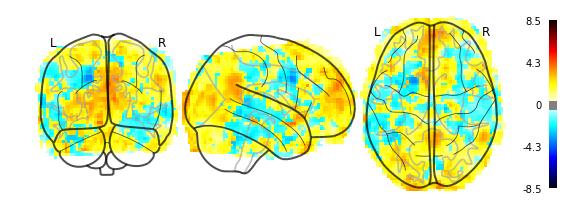

06/06/2018 17:43:05 Reconstruction Error (Frobenius Norm): 4.10472900e+03 out of 5.19534277e+03


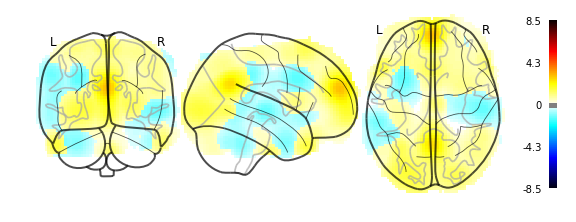

In [12]:
for b in range(htfa.num_blocks):
    htfa.plot_factor_centers(block=b)
    htfa.plot_original_brain(block=b)
    htfa.plot_reconstruction(block=b)

In [13]:
htfa.results(0)

{'factor_centers': 
 -4.8826e+01 -5.0058e+01  3.8800e+01
  7.1070e+00  8.5149e+00  7.3390e+00
 -2.8819e+01 -2.8974e+01 -1.7494e+01
  2.1878e+01 -7.6085e+01 -3.7843e+00
  4.6268e+01 -5.0014e+01  4.1717e+01
 -4.8516e+01  1.5948e+01  1.0950e+01
  4.7588e+01  5.7499e+01 -1.2259e+01
 -5.4088e+01  3.4087e+01 -6.5439e+00
  2.9728e+01 -9.5621e+01  1.3534e+00
  5.8044e+01 -5.9167e+00  1.9749e+01
 -2.4627e+01 -3.0541e+01  3.8439e+01
  1.5216e+01  4.7681e+01  3.3817e+00
  1.6419e+01  4.4714e+01  5.3042e+01
  2.9287e+00 -8.2369e+00 -4.1990e+01
  2.0810e+01  5.2571e+00  6.0831e+01
 -4.3201e+01 -7.1568e+01 -3.6244e+01
  5.7698e+01 -2.4829e+01  5.0536e+00
 -2.7986e+01 -7.3046e+01  4.4995e+01
 -2.7896e+01  6.1079e+01  2.1309e+01
  4.4837e+01 -8.1041e+01  2.0244e+01
 -5.5695e+01 -4.6274e+01  8.3744e+00
 -2.1665e+01 -8.9573e+01  2.4230e+01
  2.9912e+01 -2.1717e+01 -3.1425e+01
 -3.0190e+01  1.9055e+01  5.0442e+01
  4.7345e+01 -7.2293e+01 -5.9501e+00
 -6.5726e+01 -2.3795e+01 -1.3468e+01
 -3.3619e+01 -5.51